# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

594


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# #test the url with parameters if it work for London and inspect the stucture of retrived data:
# url = (f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}")
# city = "London"
# response = requests.get(url).json()
# # print(response)
# print(json.dumps(response, indent=4, sort_keys=True))

In [6]:
#Create lists to loopp through and store the data, you need: city, country, latitutde and longitiude, max_temp, humidity, cloudiness, wind speed, time and date
cities_all = []
lat = []
lng =[]
country = []
max_temp =[]
humidity =[]
cloudiness = []
wind =[]
date = []

#set index to 1:
index = 1

#loop through the url to find each parameter^, add it to the above lists, use: 
for index, city in enumerate(cities):
    
#provide url with parameters:
    url = (f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}")
    
    response = requests.get(url).json()
  
#try ---> except in case the data was not found:
    try:
        cities_all.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f'Processing Data: {index} city name: {city}')
        index = index + 1
   
    except:
        print(f'City "{city}" not found')
        pass

print('-----------------------------') 
print('Done')

Processing Data: 0 city name: xining
Processing Data: 1 city name: castro
Processing Data: 2 city name: ust-kuyga
Processing Data: 3 city name: cape town
Processing Data: 4 city name: busselton
Processing Data: 5 city name: vaini
Processing Data: 6 city name: bara
Processing Data: 7 city name: jamestown
Processing Data: 8 city name: palafrugell
Processing Data: 9 city name: ushuaia
Processing Data: 10 city name: ulladulla
Processing Data: 11 city name: kodiak
Processing Data: 12 city name: tuktoyaktuk
Processing Data: 13 city name: shimanovsk
Processing Data: 14 city name: panzhihua
Processing Data: 15 city name: yellowknife
Processing Data: 16 city name: hermanus
Processing Data: 17 city name: pingzhuang
Processing Data: 18 city name: atuona
Processing Data: 19 city name: jiblah
Processing Data: 20 city name: havre
Processing Data: 21 city name: bubaque
Processing Data: 22 city name: bluff
Processing Data: 23 city name: aubiere
Processing Data: 24 city name: ulaangom
City "inderborski

City "lolua" not found
Processing Data: 209 city name: lady frere
Processing Data: 210 city name: touros
Processing Data: 211 city name: sitka
City "labutta" not found
Processing Data: 213 city name: ilo
Processing Data: 214 city name: cabo rojo
Processing Data: 215 city name: hervey bay
Processing Data: 216 city name: dambulla
Processing Data: 217 city name: poum
Processing Data: 218 city name: neiafu
City "kazalinsk" not found
Processing Data: 220 city name: lompoc
Processing Data: 221 city name: partizansk
City "utiroa" not found
Processing Data: 223 city name: provideniya
City "burica" not found
Processing Data: 225 city name: bethel
Processing Data: 226 city name: coshocton
Processing Data: 227 city name: mogapi
Processing Data: 228 city name: kuliyapitiya
Processing Data: 229 city name: garowe
Processing Data: 230 city name: airai
Processing Data: 231 city name: glendive
City "monatele" not found
Processing Data: 233 city name: yulara
Processing Data: 234 city name: tosya
Process

Processing Data: 413 city name: fare
Processing Data: 414 city name: veracruz
Processing Data: 415 city name: marfino
Processing Data: 416 city name: palana
Processing Data: 417 city name: traralgon
Processing Data: 418 city name: kaitangata
Processing Data: 419 city name: luis correia
Processing Data: 420 city name: codrington
City "ahumada" not found
City "jiddah" not found
City "gurskoye" not found
Processing Data: 424 city name: dunmore town
Processing Data: 425 city name: fukue
Processing Data: 426 city name: mar del plata
Processing Data: 427 city name: sigli
Processing Data: 428 city name: tatarsk
Processing Data: 429 city name: dunedin
Processing Data: 430 city name: munteni buzau
Processing Data: 431 city name: sur
Processing Data: 432 city name: surab
Processing Data: 433 city name: half moon bay
Processing Data: 434 city name: presidencia roque saenz pena
Processing Data: 435 city name: corinto
Processing Data: 436 city name: stolin
Processing Data: 437 city name: mountain h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Convert the raw data retrived from url to DataFrame
weather_df = pd.DataFrame({
    "City" : cities_all,
    "Latitude" : lat,
    "Longitutde" : lng,
    "Country" : country,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Date" : date
})
#convert the timestamp to date:


weather_df['Date'].dt.date

#Save DataFRame as csv
weather_df.to_csv("../weather.csv", index=False, header=True)
weather_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_removed_df = weather_df[weather_df["Humidity"]<= 100]
humidity_removed_df.head
#check if the DataFrame was reduced:
print(len(humidity_removed_df))
print(len(weather_df))


536
536


In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_over100_df = weather_df[weather_df["Humidity"]> 100]
numbers = len(humidity_over100_df)
print(f" There are {numbers} outliers with humidity over 100%")

 There are 0 outliers with humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

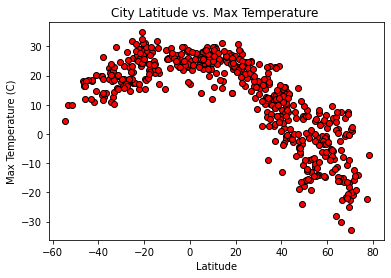

In [14]:
x = weather_df["Latitude"]
y = weather_df["Max Temp"]
plt.title(f"City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "black")
plt.savefig('../output_data/latitude_temp_plot.png')
plt.show()



## Latitude vs. Humidity Plot

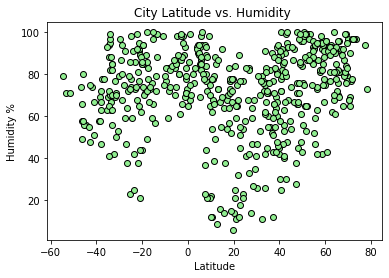

In [16]:
x = weather_df["Latitude"]
y = weather_df["Humidity"]
plt.title(f"City Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.scatter(x, y, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.savefig('../output_data/Lat_Humidity_plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

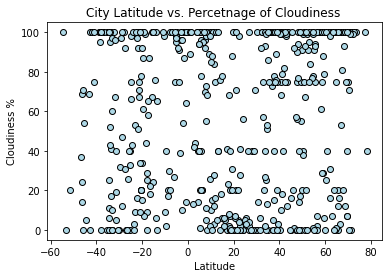

In [17]:
x = weather_df["Latitude"]
y = weather_df["Cloudiness"]
plt.title(f"City Latitude vs. Percetnage of Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.savefig('../output_data/latitude_Cloudiness_plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

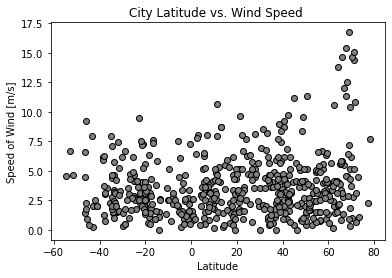

In [18]:
x = weather_df["Latitude"]
y = weather_df["Wind Speed"]
plt.title(f"City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Speed of Wind [m/s]")
plt.scatter(x, y, marker = "o", facecolors = "grey", edgecolors = "black")
plt.savefig('../output_data/latitude_wind_plot.png')
plt.show()

## Linear Regression

In [2]:
#Define new dataframes for northern (latitude >0) and southern (latitude <0) hemispheres
north_hemi_df = weather_df.loc[weather_df['Latitude']>0, :]
#north_hemi_df.head()

south_hemi_df =  weather_df.loc[weather_df['Latitude']<0, :]
#south_hemi_df.head()

NameError: name 'weather_df' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
x_value = north_hemi_df['Latitude']
y_value = north_hemi_df['Max Temp']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(21,36),fontsize = 12,color = "blue")
plt.xlim(14, 26)
plt.ylim(32, 48)
plt.xlabel("Weight (g)")
plt.ylabel("Avarage Tumour Volume (mm3)")

print(f'The correlation between mice weight and average tumour volume is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

NameError: name 'north_hemi_df' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression